In [19]:
from prophet import Prophet
import pandas as pd

In [21]:
d=pd.read_excel(r"C:\Users\prernagupta\Desktop\wovenbottom-us.xlsx")


In [22]:
d

,TREND,BASE,START_DATE,FSI,NSI,FSI_YHAT_LOWER,FSI_YHAT,FSI_YHAT_UPPER,NSI_YHAT_LOWER,NSI_YHAT,...,MARKDOWN_INDEX,FASHION_LEADERS_INDEX,TRENDING_INDEX,CATWALK_IMPACT,FSI_PIVOT_POINTS,NSI_PIVOT_POINTS,CREATED_AT,CREATED_BY,LEVELS,REGION
0,Woven Bottoms Super Woven Bottoms Us,Apparel,2016-01-04,0.054327,0.047550,0.052242,0.054196,0.055966,0.047929,0.050768,...,0.999112,0.336139,0.861254,0.049535,"['2016-01-11', '2019-07-15']","['2017-08-28', '2019-02-25']",2021-09-07 11:57:10.382,camillereyes,Super Category,US
1,Woven Bottoms Super Woven Bottoms Us,Apparel,2016-01-11,0.053871,0.046971,0.052312,0.054093,0.056011,0.048186,0.050927,...,1.000698,0.342586,0.873596,0.056747,"['2016-01-11', '2019-07-15']","['2017-08-28', '2019-02-25']",2021-09-07 11:57:10.382,camillereyes,Super Category,US
2,Woven Bottoms Super Woven Bottoms Us,Apparel,2016-01-18,0.053873,0.046675,0.051903,0.053802,0.055698,0.048021,0.051006,...,1.002210,0.348870,0.884663,0.071070,"['2016-01-11', '2019-07-15']","['2017-08-28', '2019-02-25']",2021-09-07 11:57:10.382,camillereyes,Super Category,US
3,Woven Bottoms Super Woven Bottoms Us,Apparel,2016-01-25,0.054011,0.046617,0.051473,0.053396,0.055351,0.048155,0.050986,...,1.003650,0.354990,0.894454,0.079953,"['2016-01-11', '2019-07-15']","['2017-08-28', '2019-02-25']",2021-09-07 11:57:10.382,camillereyes,Super Category,US
4,Woven Bottoms Super Woven Bottoms Us,Apparel,2016-02-01,0.053444,0.046752,0.051055,0.052975,0.054881,0.047819,0.050858,...,1.005016,0.360947,0.902969,0.088837,"['2016-01-11', '2019-07-15']","['2017-08-28', '2019-02-25']",2021-09-07 11:57:10.382,camillereyes,Super Category,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Woven Bottoms Super Woven Bottoms Us,Apparel,2022-06-27,NaN,NaN,0.053710,0.056159,0.058602,0.042890,0.046414,...,NaN,NaN,NaN,0.000000,"['2016-01-11', '2019-07-15']","['2017-08-28', '2019-02-25']",2021-09-07 11:57:10.382,camillereyes,Super Category,US
339,Woven Bottoms Super Woven Bottoms Us,Apparel,2022-07-04,NaN,NaN,0.053482,0.056066,0.058686,0.043402,0.046807,...,NaN,NaN,NaN,0.000000,"['2016-01-11', '2019-07-15']","['2017-08-28', '2019-02-25']",2021-09-07 11:57:10.382,camillereyes,Super Category,US
340,Woven Bottoms Super Woven Bottoms Us,Apparel,2022-07-11,NaN,NaN,0.053319,0.056032,0.058734,0.043751,0.047230,...,NaN,NaN,NaN,0.000000,"['2016-01-11', '2019-07-15']","['2017-08-28', '2019-02-25']",2021-09-07 11:57:10.382,camillereyes,Super Category,US
341,Woven Bottoms Super Woven Bottoms Us,Apparel,2022-07-18,NaN,NaN,0.053468,0.056065,0.058718,0.044366,0.047676,...,NaN,NaN,NaN,0.000000,"['2016-01-11', '2019-07-15']","['2017-08-28', '2019-02-25']",2021-09-07 11:57:10.382,camillereyes,Super Category,US


In [23]:
d=d.iloc[:, [2,3]]

In [24]:
df=d.dropna()
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

<ipython-input-24-ec1e916fc466>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']= pd.to_datetime(df['ds'])


In [25]:
df

,ds,y
0,2016-01-04,0.054327
1,2016-01-11,0.053871
2,2016-01-18,0.053873
3,2016-01-25,0.054011
4,2016-02-01,0.053444
...,...,...
286,2021-06-28,0.058932
287,2021-07-05,0.058979
288,2021-07-12,0.057592
289,2021-07-19,0.056605


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


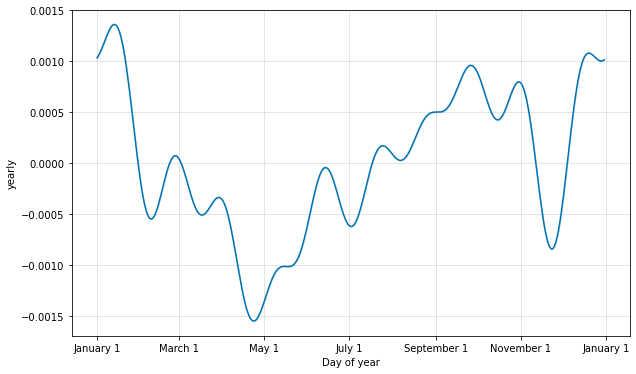

In [26]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


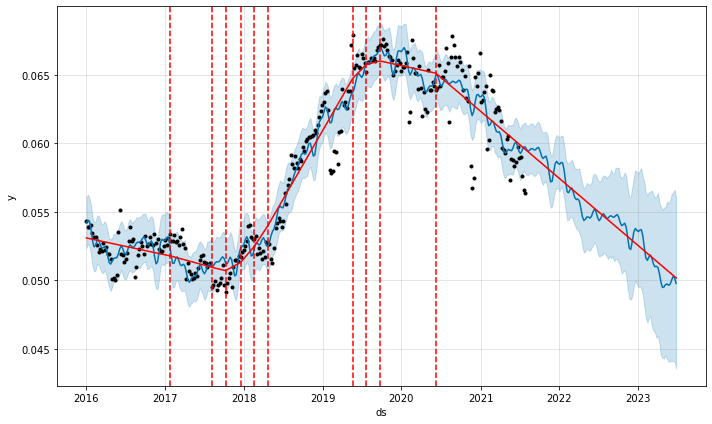

In [27]:
from prophet.plot import add_changepoints_to_plot
m = Prophet()
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=100, freq='W')
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


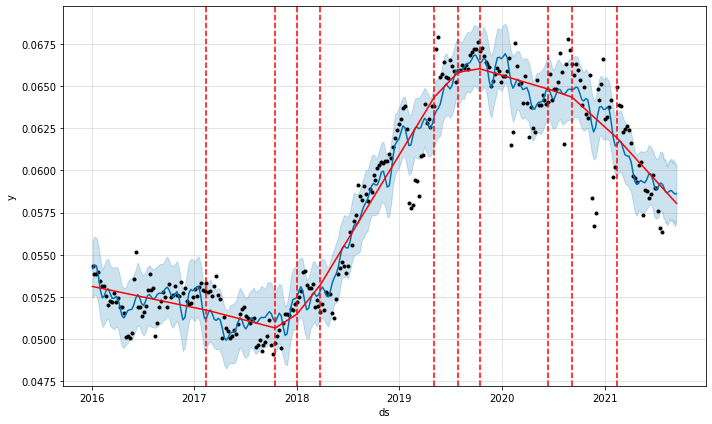

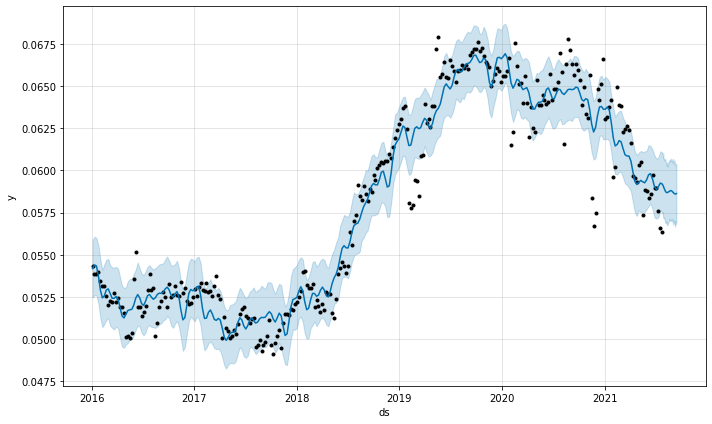

In [28]:
from prophet.plot import add_changepoints_to_plot
m = Prophet(yearly_seasonality=True, changepoint_range=1.0  ,changepoint_prior_scale=0.05, growth='linear')
# define the model
# fit the model
m.fit(df)

future = m.make_future_dataframe(periods=50)
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)
fig = m.plot(fcst)

In [29]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,0.053124,0.052452,0.055879,0.053124,0.053124,0.001062,0.001062,0.001062,0.001062,0.001062,0.001062,0.0,0.0,0.0,0.054186
1,2016-01-11,0.053100,0.052615,0.056078,0.053100,0.053100,0.001300,0.001300,0.001300,0.001300,0.001300,0.001300,0.0,0.0,0.0,0.054400
2,2016-01-18,0.053076,0.052588,0.056003,0.053076,0.053076,0.001264,0.001264,0.001264,0.001264,0.001264,0.001264,0.0,0.0,0.0,0.054340
3,2016-01-25,0.053052,0.052099,0.055556,0.053052,0.053052,0.000693,0.000693,0.000693,0.000693,0.000693,0.000693,0.0,0.0,0.0,0.053744
4,2016-02-01,0.053027,0.051235,0.054710,0.053027,0.053027,-0.000110,-0.000110,-0.000110,-0.000110,-0.000110,-0.000110,0.0,0.0,0.0,0.052917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2021-09-10,0.058127,0.056776,0.060361,0.058081,0.058183,0.000478,0.000478,0.000478,0.000478,0.000478,0.000478,0.0,0.0,0.0,0.058605
337,2021-09-11,0.058108,0.056868,0.060245,0.058061,0.058169,0.000497,0.000497,0.000497,0.000497,0.000497,0.000497,0.0,0.0,0.0,0.058606
338,2021-09-12,0.058090,0.056985,0.060247,0.058040,0.058152,0.000520,0.000520,0.000520,0.000520,0.000520,0.000520,0.0,0.0,0.0,0.058610
339,2021-09-13,0.058072,0.056799,0.060412,0.058018,0.058136,0.000546,0.000546,0.000546,0.000546,0.000546,0.000546,0.0,0.0,0.0,0.058618


In [30]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')


INFO:prophet:Making 6 forecasts with cutoffs between 2018-02-07 00:00:00 and 2020-07-26 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

In [31]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,0.000008,0.002909,0.002380,0.038951,0.031734,0.038386,0.290323
1,37 days,0.000009,0.003061,0.002499,0.041116,0.032323,0.040391,0.290323
2,39 days,0.000008,0.002878,0.002351,0.038470,0.031734,0.037901,0.322581
3,40 days,0.000008,0.002879,0.002353,0.038687,0.031734,0.038112,0.322581
4,41 days,0.000008,0.002882,0.002377,0.039048,0.031734,0.038476,0.322581


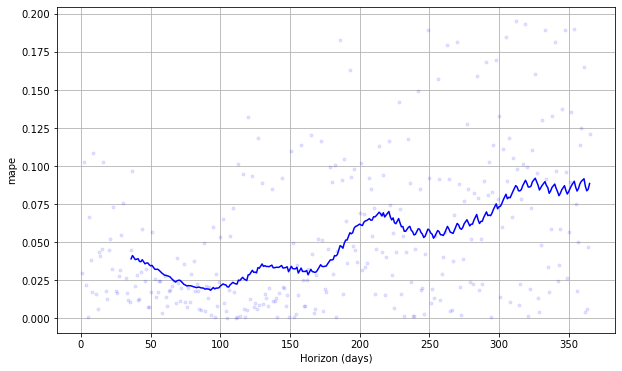

In [32]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
